In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [248]:
data = pd.read_csv('PracticeDataset.csv')
data.shape

(404736, 2)

In [3]:
data.describe()

,Time,RESP
count,404736.000000,404736.000000
mean,790.498047,-0.099881
std,456.395952,1.905406
min,0.000000,-3.000000
25%,395.249023,-1.676923
50%,790.498047,-0.490110
75%,1185.747071,1.569963
max,1580.996094,3.000000


Time taken = 1581/60 = 26.35 mins

In [14]:
data.head()

,Time,RESP
0,0.000000,-1.936264
1,0.003906,-1.946520
2,0.007812,-1.953846
3,0.011719,-1.964103
4,0.015625,-1.972894


In [249]:
ll = 1321
ul = ll + 60
time_stamp = data[(data['Time'] >= ll) & (data['Time'] <= ul)].to_numpy()
time_stamp.shape

(15361, 2)

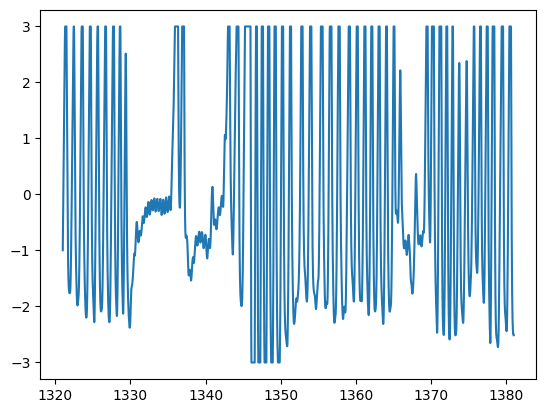

In [250]:
plt.plot(time_stamp[:,0], time_stamp[:,1])
plt.show()

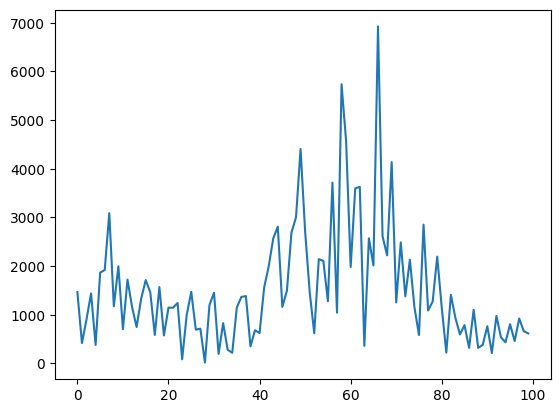

In [251]:
fft = np.fft.fft(time_stamp[:,1])
plt.plot(abs(fft)[0:100])
plt.show()

In [252]:
len(time_stamp[:,1])

15361

In [253]:
len(time_stamp[:,0]) // 60

256

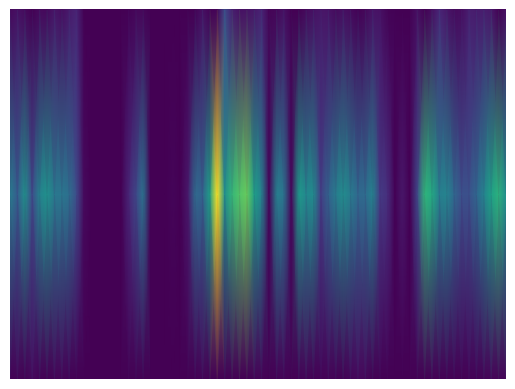

In [254]:
f, t, Sxx = scipy.signal.spectrogram(time_stamp[:,1], len(time_stamp[:,0]) // 60)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylim([0, 2])
plt.yticks(np.arange(0, 2, .1))
plt.axis('off')
plt.savefig('/content/drive/MyDrive/psd_spectrogram/spectrogram.png')

In [255]:
np.argmax(abs(fft)[0:len(fft)//2])

66

In [140]:
import scipy.signal

In [215]:
data.Time.max()

1580.996094

In [239]:
bpm = []
lower_limit = []
upper_limit = []
for i in range(0, int(data.Time.max()//60) + 1):
  ll = i * 60
  lower_limit.append(ll)
  ul = ll + 60
  upper_limit.append(ul)
  time_stamp = data[(data['Time'] >= ll) & (data['Time'] <= ul)].to_numpy()
  fft = np.fft.fft(time_stamp[:,1])
  bpm.append(np.argmax(abs(fft)[0:len(fft)//2]))
  f, t, Sxx = scipy.signal.spectrogram(time_stamp[:,1], len(time_stamp[:,0]) // 60)
  plt.pcolormesh(t, f, Sxx, shading='gouraud')
  plt.ylim([0, 2])
  plt.yticks(np.arange(0, 2, .1))
  plt.axis('off')
  plt.savefig('/content/drive/MyDrive/psd_spectrogram/spectrogram'+str(i)+'.png')
  plt.close()

In [238]:
len(bpm)

27

In [240]:
data = {'lower_limit': lower_limit, 'upper_limit': upper_limit, 'bpm': bpm}
df = pd.DataFrame(data)
df

,lower_limit,upper_limit,bpm
0,0,60,57
1,60,120,63
2,120,180,67
3,180,240,6
4,240,300,63
5,300,360,48
6,360,420,67
7,420,480,65
8,480,540,74
9,540,600,70


In [244]:
df['condition'] = np.where(df['bpm'] > 30, 'normal', 'abnormal')

In [245]:
df

,lower_limit,upper_limit,bpm,condition
0,0,60,57,normal
1,60,120,63,normal
2,120,180,67,normal
3,180,240,6,abnormal
4,240,300,63,normal
5,300,360,48,normal
6,360,420,67,normal
7,420,480,65,normal
8,480,540,74,normal
9,540,600,70,normal


In [234]:
df.to_csv('bpm.csv')

In [246]:
df.bpm[(df.bpm<30)]

3      6
10    14
12     6
13    19
15     5
19    13
23    20
26    23
Name: bpm, dtype: int64